In [1]:
import os
import numpy as np
import pandas as pd
import json
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import seaborn as sns
from picconfig import imputepath, outputpath, numericpath

In [2]:
legend_names = ["Missforest", "Mean-Mode", "Median-Mode", "Zero-Mode", "MIM", "Hybrid", "Hybrid-MIM"]
order = [4,3,5,2,1,0,6]

In [3]:
seqhue=[]
seqgroup=[]
seqdata=[]
for i in range(1,7):
    for j in range(7):
        filename = imputepath + str(i) + str(order[j]) + '.npy'
        temp = np.load(filename)
        seqdata += temp.tolist()
        seqgroup += [str(i)] * len(temp)
        seqhue += [str(j)] * len(temp)
df = pd.DataFrame({'group':seqgroup,'hue':seqhue,'data':seqdata})

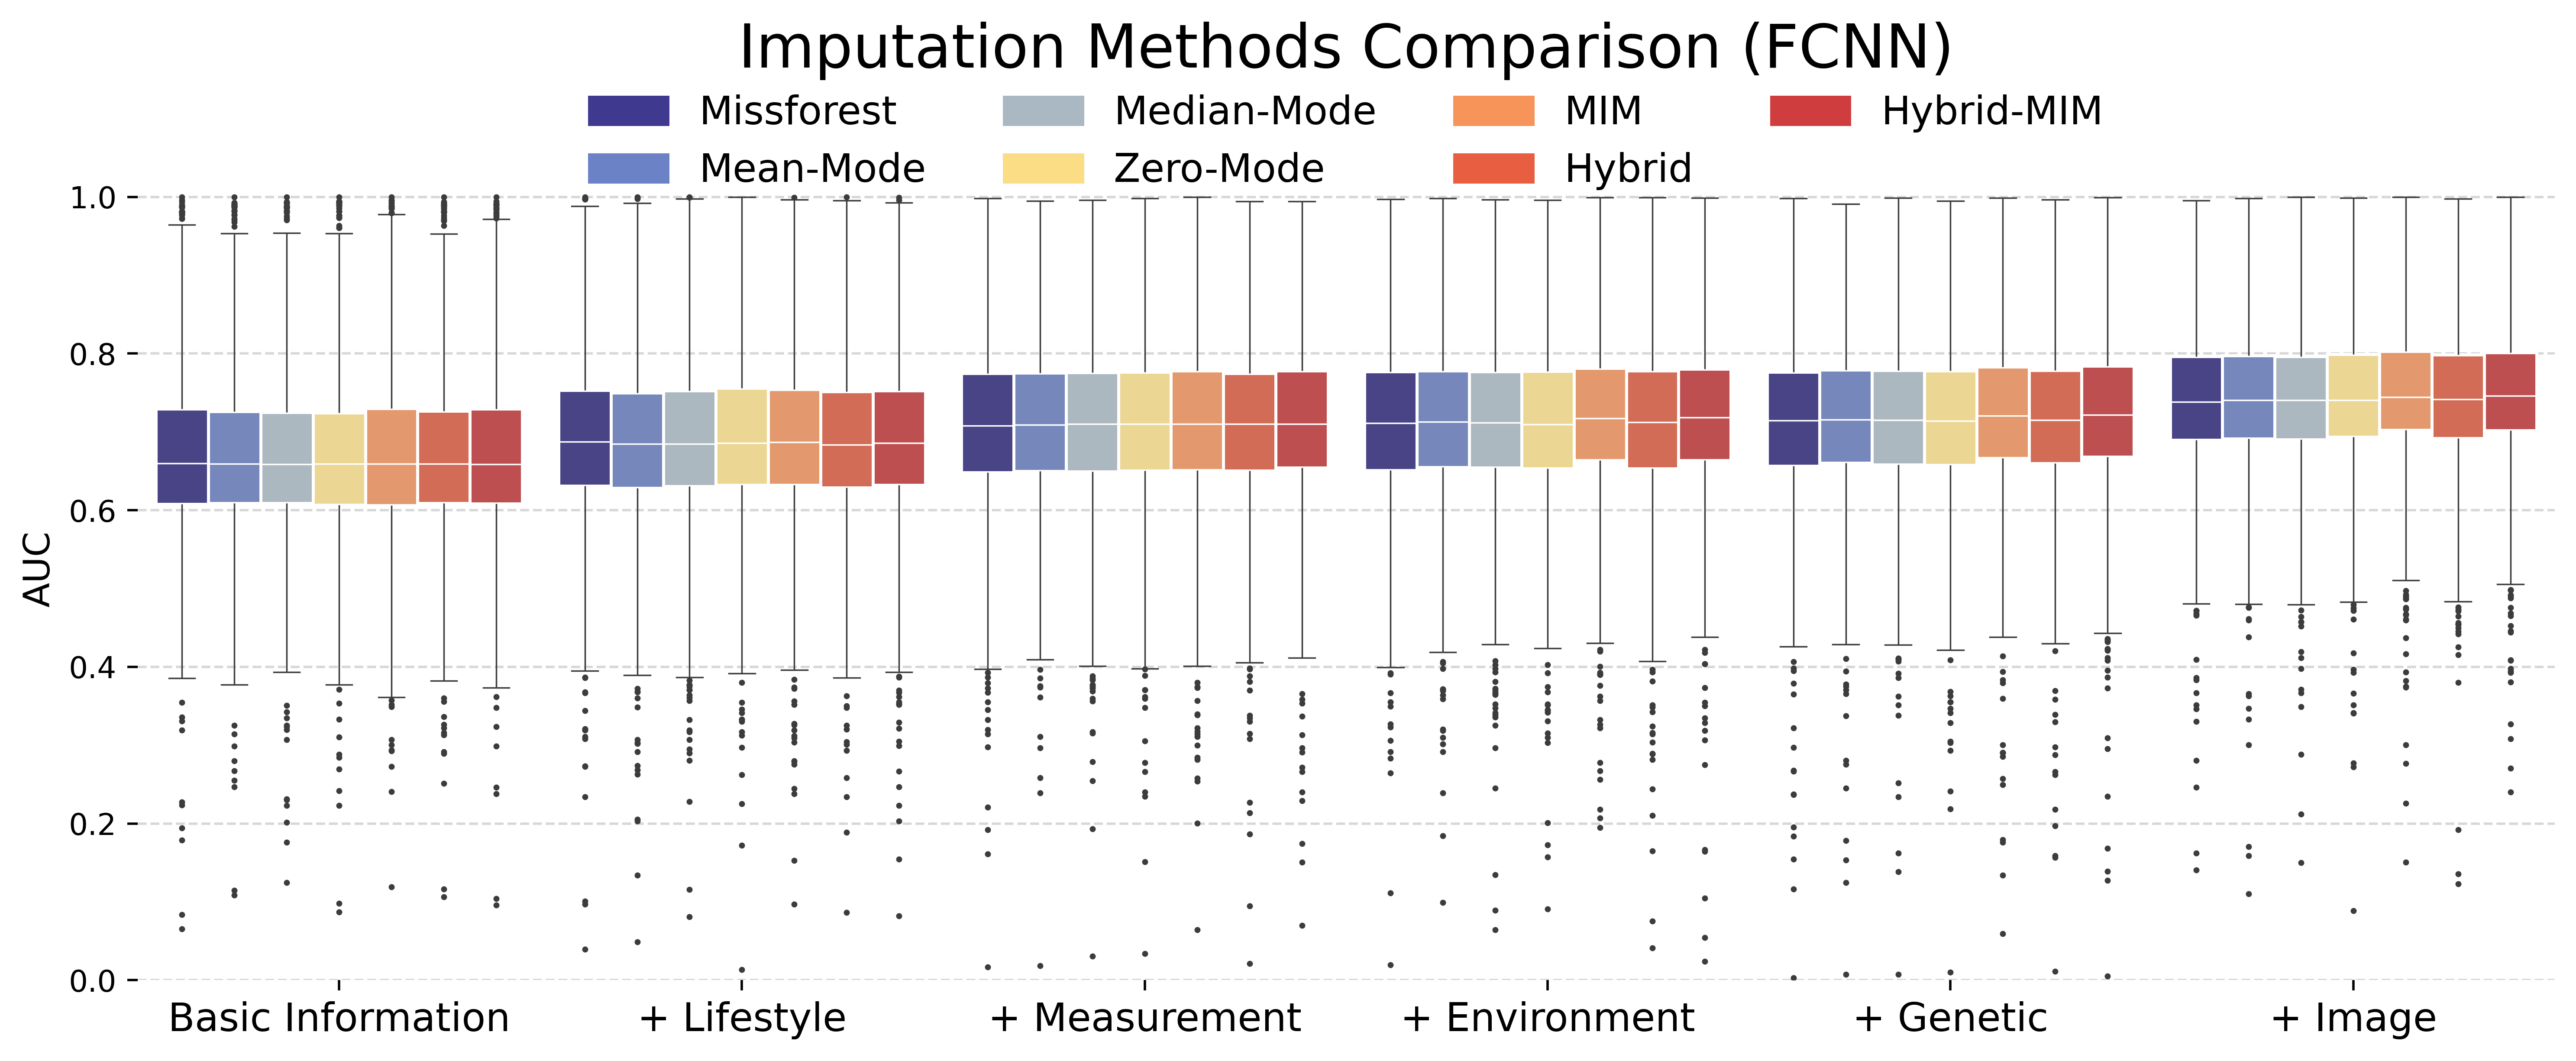

In [4]:
colors = ['#403990','#80A6E2','#FBDD85','#F46F43','#CF3D3E']
cm = LinearSegmentedColormap.from_list('Nature', colors, N=7)
smedian = df.groupby(['hue','group'])['data'].median()
colorlist = []
for i in range(7):
    colorlist.append(cm(i))
color_palette = sns.color_palette(colorlist)
plt.figure(dpi=500, figsize=(12,5))
# plt.locator_params(axis='y', nbins=11)
plt.grid(True,linestyle='--',alpha=0.5)
ax=sns.boxplot(y='data',x='group',hue='hue',palette=color_palette,data=df, whis=2, fliersize=1, notch=False,
            showfliers=True, width = 0.91, boxprops={'linewidth': 1, 'linestyle':"-", 'edgecolor':'white'}, whiskerprops={'linestyle': '-', 'linewidth': 0.5},
            capprops={'linewidth': 0.5}, medianprops={'linewidth': 0.5, 'color':'white'}, gap=0)
names=['Basic Information','+ Lifestyle','+ Measurement','+ Environment','+ Genetic', '+ Image']
plt.xticks(np.arange(len(names)), names, fontsize=13,rotation=0)
legend_handles=[]
for i in range(7):
    legend_handles.append(Patch(color=colorlist[i], label=legend_names[i]))
legend = plt.legend(handles=legend_handles, ncol=4,fontsize=13,loc='upper center',bbox_to_anchor=(0.5, 1.12))
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('none') 
plt.ylim(0,1.05)
plt.xlabel("")
plt.ylabel("AUC", fontsize=12)
title = 'Imputation Methods Comparison (FCNN)'
plt.title(title, pad=30, fontsize=20)
plt.tight_layout()
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
for i in range(1,7):
    for j in range(7):
        text = smedian.loc[str(j), str(i)]
        # print(text)
        # ax.text(i + 0.13 * j - 1.39, text+0.005, "{:.3f}".format(text), ha="center", fontsize=6)
plt.savefig(outputpath + 'sup_compare_missing.pdf', format='pdf',bbox_inches="tight")
plt.show()

In [5]:
d = df.groupby(['group','hue']).median().data.to_numpy()
m = {}
for i, name in enumerate(names):
    m[name] = list(d[(i*7):(i*7+7)])
json_file_path = numericpath + title + '.json'
with open(json_file_path, 'w', encoding='utf-8') as f:
    json.dump(m, f, ensure_ascii=False, indent=4)